In [147]:
!pip install yfinance

In [148]:
import yfinance as yf
from datetime import datetime
import pandas as pd


In [149]:
end = datetime.now()
start = datetime(end.year-15,end.month,end.day)


In [150]:

ticker = 'GOOG'
data = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed


In [151]:
data.head()


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2010-01-13,14.570089,14.602104,14.242748,14.307024,260838034
2010-01-14,14.638586,14.746542,14.463870,14.490921,170239717
2010-01-15,14.394134,14.730659,14.345491,14.725198,218194794
2010-01-19,14.583243,14.652733,14.302061,14.423915,173315202
2010-01-20,14.404309,14.542543,14.277243,14.542543,130515377


In [152]:
data.shape

(3774, 5)

In [153]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,61.557336,62.170705,60.924415,61.526416,5.282486e+07
std,47.566180,48.079961,47.055527,47.536162,4.838864e+07
min,10.822155,10.976272,10.761600,10.877746,1.584340e+05
25%,22.802666,22.865763,22.580548,22.813462,2.404400e+07
50%,46.393553,46.680146,46.085411,46.414727,3.369000e+07
75%,94.440664,95.809395,93.376993,94.358465,7.018810e+07
max,198.160004,202.880005,196.690002,198.529999,5.952147e+08


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-13 to 2025-01-13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   3774 non-null   float64
 1   (High, GOOG)    3774 non-null   float64
 2   (Low, GOOG)     3774 non-null   float64
 3   (Open, GOOG)    3774 non-null   float64
 4   (Volume, GOOG)  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB


In [155]:
data.isna().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
def plot_graph(figsize,values,Col_Name) :
 plt.figure()
 values.plot(figsize = figsize)
 plt.title(f'{Col_Name}')
 plt.xlabel('Years')
 plt.ylabel(Col_Name)

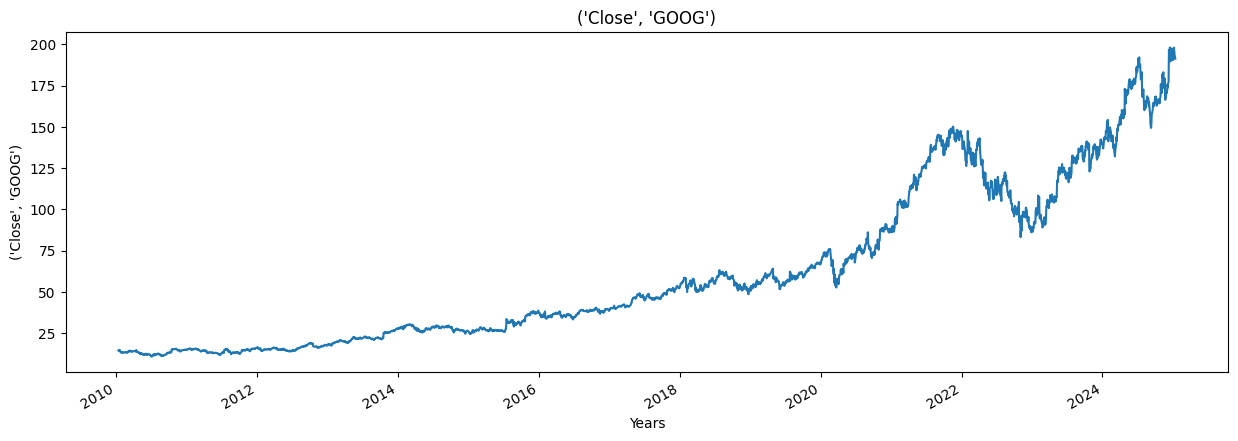

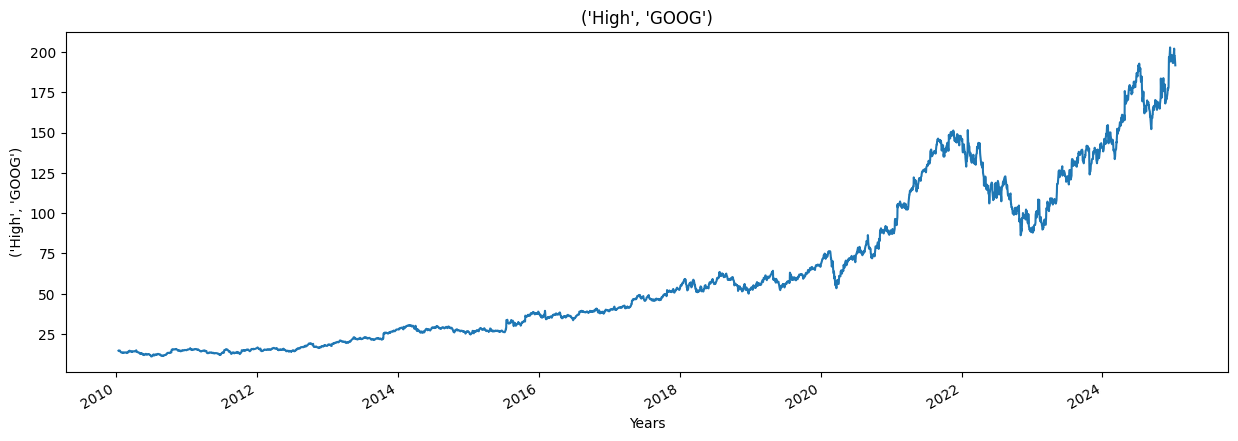

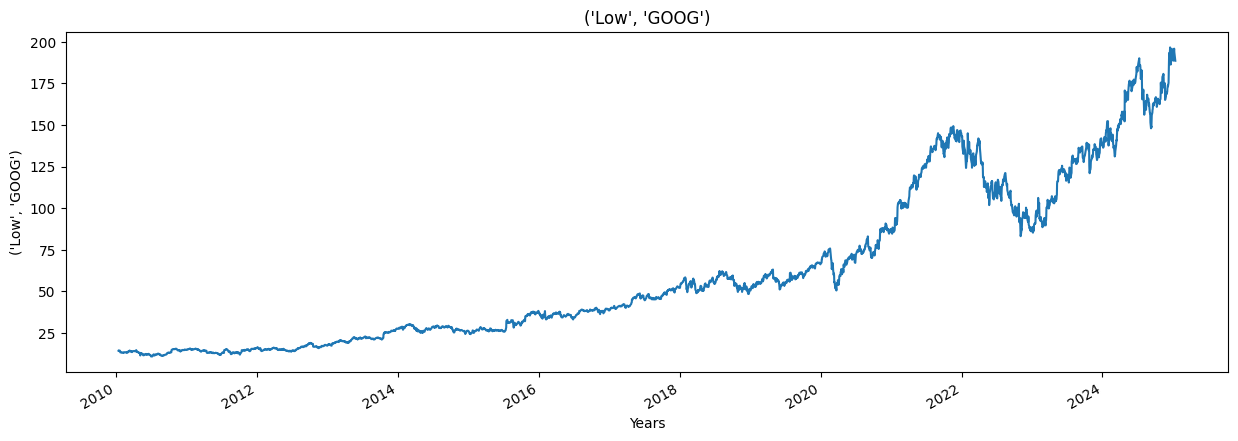

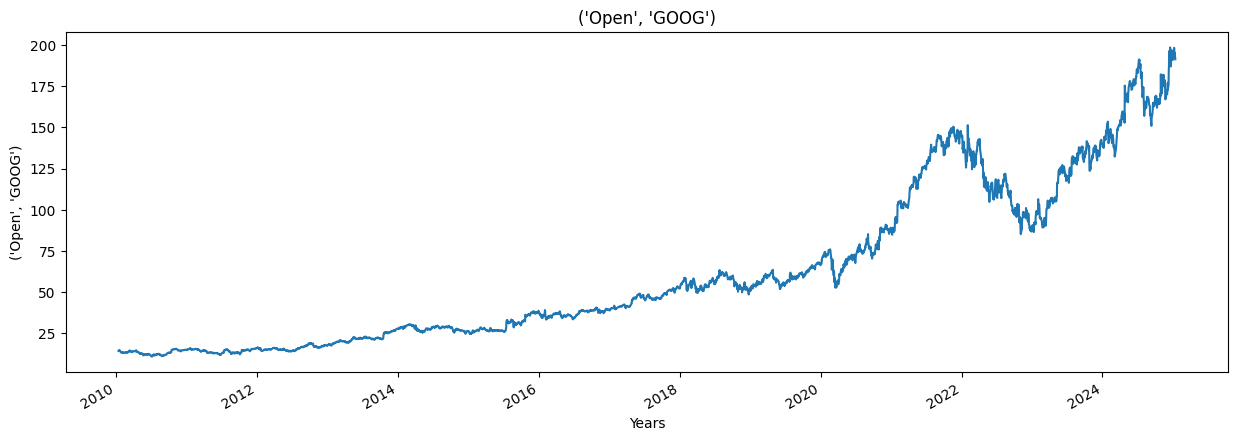

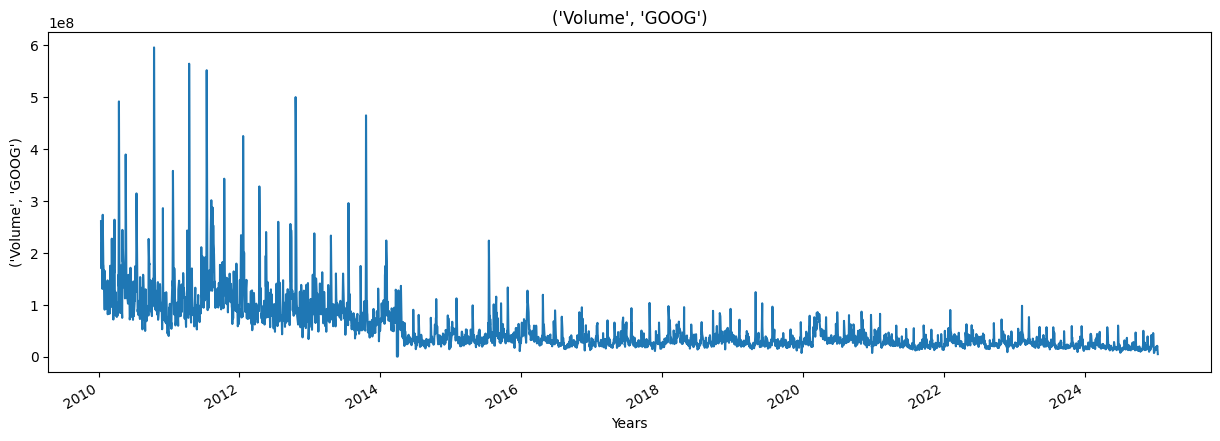

In [158]:
for column in data.columns :
 plot_graph((15,5),data[column],column)

In [159]:
for i in range (2010,2026) :
  print(i,list(data.index.year).count(i))

2010 245
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 7


In [160]:
data['MA_250'] = data['Close'].rolling(250).mean()

In [161]:
data['MA_250'][0:250].tail()

,MA_250
Date,
2011-01-03,NaN
2011-01-04,NaN
2011-01-05,NaN
2011-01-06,NaN
2011-01-07,13.279908


<Figure size 640x480 with 0 Axes>

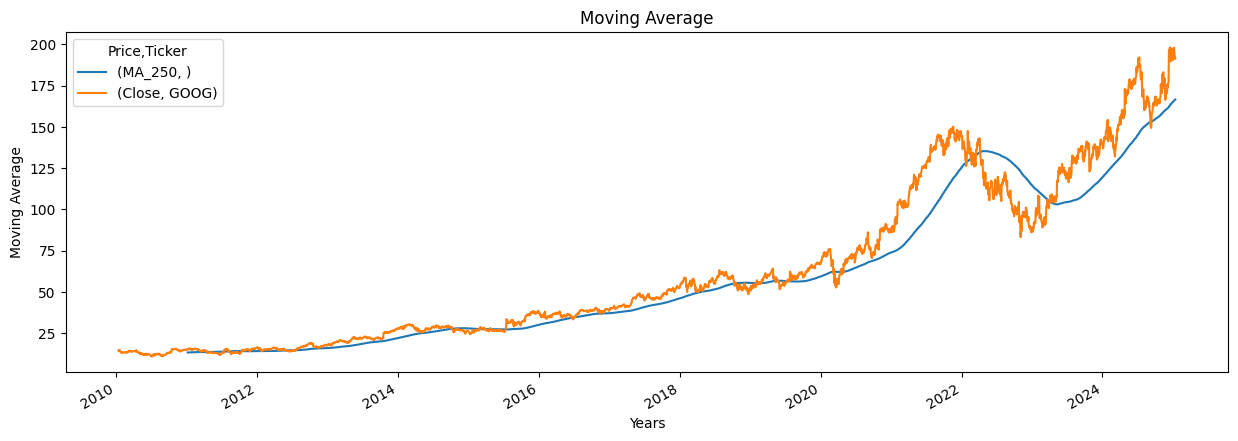

In [162]:
plot_graph((15,5),data[['MA_250','Close']],'Moving Average')

<Figure size 640x480 with 0 Axes>

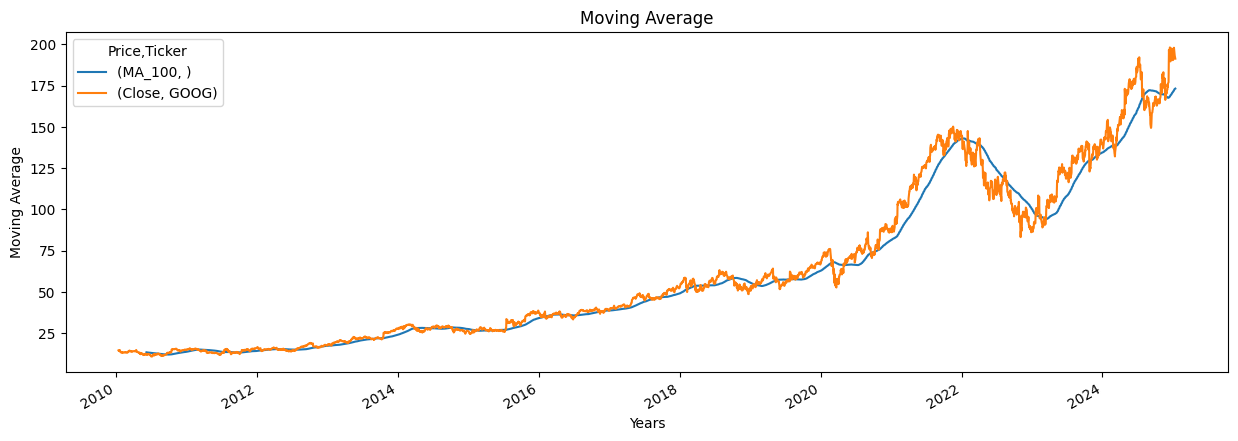

In [163]:
data['MA_100'] = data['Close'].rolling(100).mean()
plot_graph((15,5),data[['MA_100','Close']],'Moving Average')


<Figure size 640x480 with 0 Axes>

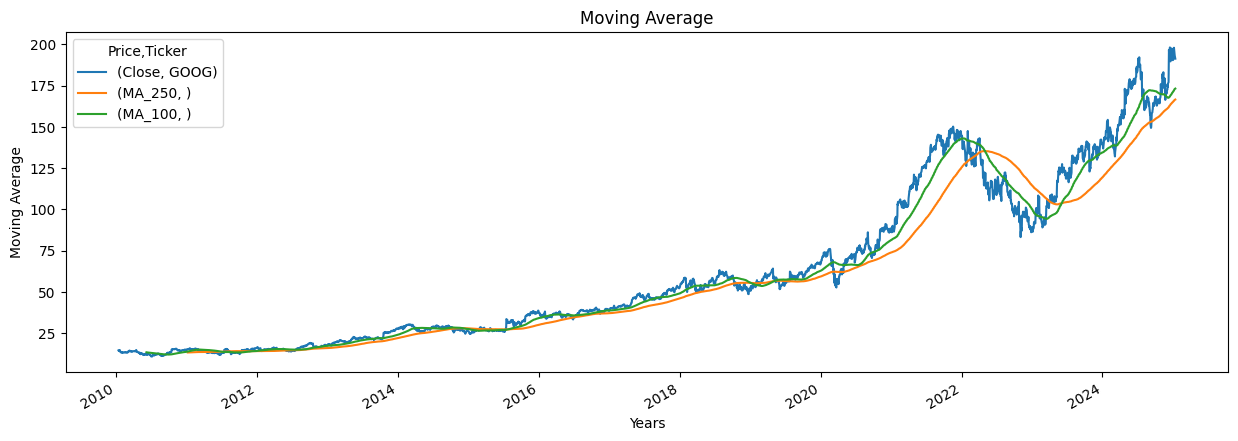

In [164]:
plot_graph((15,5),data[['Close','MA_250','MA_100']],'Moving Average')

In [165]:
data['percentage_changes'] = data['Close'].pct_change()

In [166]:
data

Price,Close,High,Low,Open,Volume,MA_250,MA_100,percentage_changes
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,
Date,,,,,,,,
2010-01-13,14.570089,14.602104,14.242748,14.307024,260838034,NaN,NaN,NaN
2010-01-14,14.638586,14.746542,14.463870,14.490921,170239717,NaN,NaN,0.004701
2010-01-15,14.394134,14.730659,14.345491,14.725198,218194794,NaN,NaN,-0.016699
2010-01-19,14.583243,14.652733,14.302061,14.423915,173315202,NaN,NaN,0.013138
2010-01-20,14.404309,14.542543,14.277243,14.542543,130515377,NaN,NaN,-0.012270
...,...,...,...,...,...,...,...,...
2025-01-06,197.960007,199.559998,195.059998,195.149994,19483300,165.753345,172.007040,0.025009
2025-01-07,196.710007,202.139999,195.940002,198.270004,16966800,165.971987,172.357804,-0.006314


In [167]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'])

In [168]:
scaled_data

array([[0.02000628],
       [0.02037192],
       [0.01906704],
       ...,
       [0.98521386],
       [0.9733636 ],
       [0.96359514]])

In [169]:
len(scaled_data)

3774

In [170]:
x_data=[]
y_data=[]
for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

import numpy as np
x_data , y_data  = np.array(x_data) , np.array(y_data)


In [171]:
x_data[0], y_data[0]

(array([[0.02000628],
        [0.02037192],
        [0.01906704],
        [0.0200765 ],
        [0.01912136],
        [0.01946182],
        [0.01509414],
        [0.01376807],
        [0.01408866],
        [0.01404627],
        [0.01301164],
        [0.01243538],
        [0.01284339],
        [0.01259169],
        [0.01387669],
        [0.01201676],
        [0.01261422],
        [0.01290301],
        [0.01329646],
        [0.01303284],
        [0.01329116],
        [0.01285664],
        [0.01394028],
        [0.01353094],
        [0.01419463],
        [0.01386875],
        [0.014139  ],
        [0.01311497],
        [0.01263806],
        [0.01197038],
        [0.01201941],
        [0.01279968],
        [0.01390849],
        [0.01447283],
        [0.01570087],
        [0.01697527],
        [0.01674609],
        [0.01644272],
        [0.01859677],
        [0.01921807],
        [0.0190061 ],
        [0.01683883],
        [0.01710643],
        [0.01715411],
        [0.01726539],
        [0

In [172]:
splitting_len= int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]


In [173]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(2571, 100, 1) (2571, 1) (1103, 100, 1) (1103, 1)


In [174]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [175]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [176]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [177]:
model.fit(x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 246ms/step - loss: 0.0039
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - loss: 4.7666e-05
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - loss: 5.5772e-05
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - loss: 5.1154e-05
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - loss: 4.8991e-05
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - loss: 5.8716e-05
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - loss: 4.5338e-05
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - loss: 5.5284e-05
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - loss: 4.4506e-05
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - loss: 4.8199e-05
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - loss: 3.7754e-05
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - loss: 4.5742e-05
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - loss: 4.3134e-05
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - loss: 4.

In [178]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [179]:
predictions = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step


In [180]:
predictions

array([[0.36250383],
       [0.36587456],
       [0.3693854 ],
       ...,
       [0.9737722 ],
       [0.97851145],
       [0.97928035]], dtype=float32)

In [181]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 78.73284],
       [ 79.3643 ],
       [ 80.02202],
       ...,
       [193.24655],
       [194.13438],
       [194.27843]], dtype=float32)

In [182]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 79.12569427],
       [ 80.12311554],
       [ 82.32321167],
       ...,
       [195.38999939],
       [193.16999817],
       [191.33999634]])

In [183]:
rmse = np.sqrt(np.mean(((inv_predictions-inv_y_test)**2)))
rmse

3.4937866536084488

In [184]:
ploting_data = pd.DataFrame(
    {
      'Actual':inv_y_test.reshape(-1),
      'Predicted':inv_predictions.reshape(-1)
    } , index = data.index[splitting_len+100:]
)
ploting_data.head()

,Actual,Predicted
Date,,
2020-08-24,79.125694,78.732841
2020-08-25,80.123116,79.364304
2020-08-26,82.323212,80.022018
2020-08-27,81.423935,80.963326
2020-08-28,81.926125,81.730377


<Figure size 640x480 with 0 Axes>

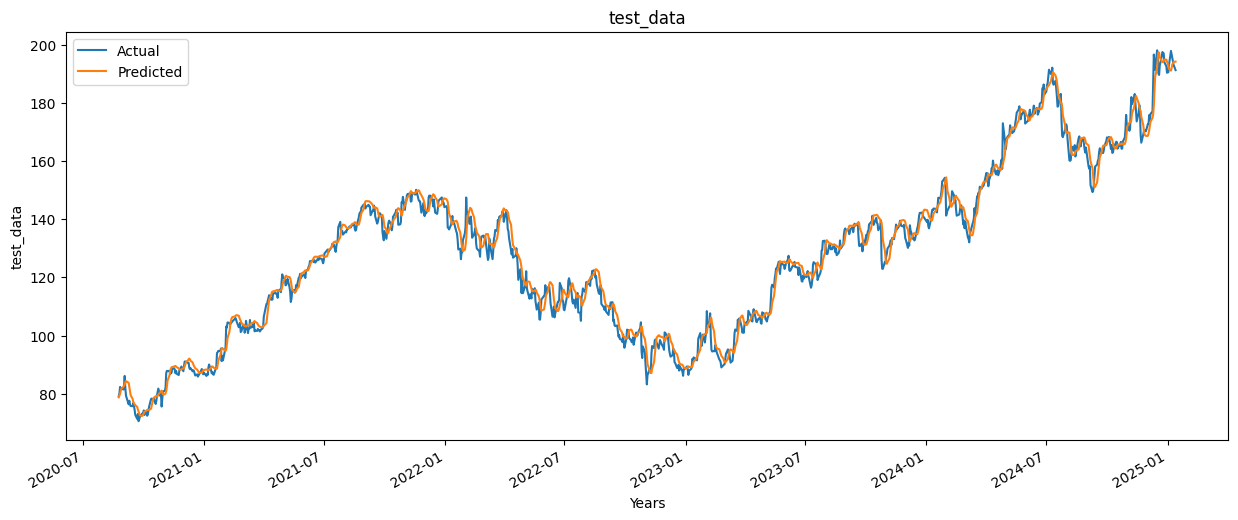

In [185]:
plot_graph((15,6),ploting_data,'test_data')

<Figure size 640x480 with 0 Axes>

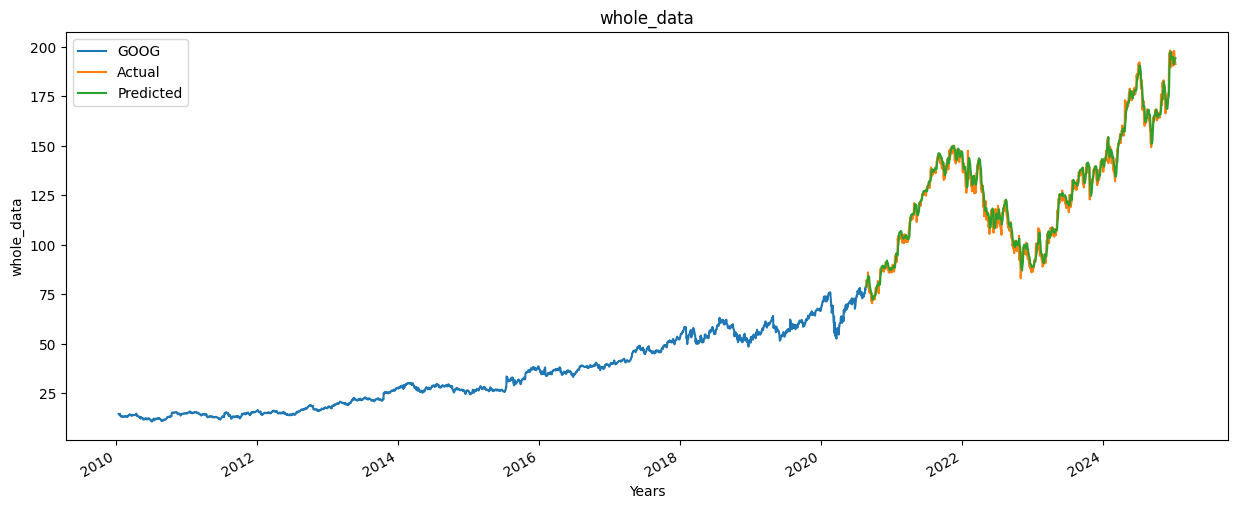

In [186]:
plot_graph((15,6),pd.concat([data['Close'][:splitting_len+100],ploting_data],axis=0),'whole_data')

In [187]:
model.save('latest_stock_price_model.keras')